In [9]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def plot_prediction_vs_truth(y_test, y_pred, model="", title="Prediction vs Truth"):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label="Predictions")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Ideal Fit")
    plt.title(f"{model} {title}")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.grid()
    plt.show()

    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.2f}")


def plot_residuals(y_test, y_pred, model="", title="Residual Plot"):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, alpha=0.7, color='purple')
    plt.axhline(0, color='red', linestyle='--', label="Zero Error")
    plt.title(f"{model}: {title}")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals (Truth - Prediction)")
    plt.legend()
    plt.grid()
    plt.show()


def plot_predictions_and_truth(y_test, y_pred, x_values=None, model="", title="Prediction vs Truth"):
    plt.figure(figsize=(10, 6))

    if x_values is None:
        x_values = range(len(y_test))

    plt.plot(x_values, y_test, label="True Values", color='blue', marker='o', linestyle='-', alpha=0.7)
    plt.plot(x_values, y_pred, label="Predicted Values", color='orange', marker='x', linestyle='--', alpha=0.7)

    plt.title(f"{model} {title}")
    plt.xlabel("Index or Feature")
    plt.ylabel("Values")
    plt.legend()
    plt.grid()
    plt.show()



# Loading data

In [11]:
df = pd.read_csv("sbern_2_clean_data_PCA.csv")
df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC205,PC206,PC207,PC208,PC209,PC210,PC211,PC212,max_salary,min_salary
0,0.136298,0.202938,0.017407,0.115302,0.061801,0.087450,-0.170609,0.148076,0.093551,-0.101027,...,-0.028306,-0.037820,-0.011885,-0.000943,0.016466,0.000568,-0.016943,-0.015513,41600.0,35360.0
1,-0.342289,-0.013625,0.077035,-0.129389,0.084460,0.255426,-0.077733,0.022055,-0.106212,-0.006364,...,0.001814,0.001787,-0.004591,-0.002496,-0.005305,-0.040619,-0.014281,-0.073289,104000.0,62400.0
2,-0.000155,0.123623,-0.004453,0.242199,-0.134663,0.076023,-0.017160,0.084994,-0.130418,0.086450,...,0.036098,-0.006742,0.005482,-0.037793,0.064383,-0.070899,0.053890,0.032912,65000.0,45000.0
3,-0.109991,0.150033,-0.109075,-0.219562,0.227574,0.206502,-0.122635,0.193668,-0.094523,-0.163857,...,-0.033366,0.022768,0.012953,-0.012293,-0.021907,-0.003901,0.007655,-0.008467,175000.0,140000.0
4,-0.046352,-0.126525,0.084076,0.194379,-0.022354,-0.073512,0.014311,0.017243,-0.139649,-0.173850,...,0.034388,0.016052,0.002203,-0.001651,0.028253,0.010441,0.001646,-0.009040,80000.0,60000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27966,-0.181064,0.020990,-0.101993,-0.234869,0.156127,-0.085844,-0.075128,0.167272,0.223592,-0.102588,...,-0.005117,0.009112,-0.019742,-0.012642,0.006292,-0.025874,0.008961,-0.006007,93600.0,72800.0
27967,-0.062089,0.067091,-0.083694,0.171000,-0.204710,0.128666,-0.024938,0.012567,0.075908,-0.020666,...,-0.002262,-0.007114,-0.035842,0.031288,0.005770,0.012098,0.016336,-0.022069,65000.0,50000.0
27968,-0.066488,-0.264636,0.127959,-0.188287,-0.075430,-0.201351,0.165507,0.169049,0.008547,-0.021483,...,0.012447,-0.009401,0.028309,-0.005321,-0.006137,0.017742,0.026575,-0.012997,104000.0,62400.0
27969,-0.061350,-0.002184,-0.145496,-0.115441,0.160701,0.176814,-0.157667,0.055441,-0.321739,-0.080777,...,-0.039570,-0.006615,-0.009282,0.000346,-0.033186,0.017952,0.001946,0.058829,195000.0,120000.0


In [12]:
X = df.drop(columns=["min_salary", "max_salary"])
y_min = df["min_salary"]
y_max = df["max_salary"]


from sklearn.preprocessing import StandardScaler

# Extract target columns
y_min = df["min_salary"].values.reshape(-1, 1)
y_max = df["max_salary"].values.reshape(-1, 1)

# Initialize scalers
scaler_min = StandardScaler()
scaler_max = StandardScaler()

# Standardize (fit and transform)
y_min = scaler_min.fit_transform(y_min).ravel()
y_max = scaler_max.fit_transform(y_max).ravel()


X_train, X_test, y_min_train, y_min_test, y_max_train, y_max_test = train_test_split(
    X, y_min, y_max, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_min_train shape:", y_min_train.shape)
print("y_min_test shape:", y_min_test.shape)
print("y_max_train shape:", y_max_train.shape)
print("y_max_test shape:", y_max_test.shape)

X_train shape: (22376, 212)
X_test shape: (5595, 212)
y_min_train shape: (22376,)
y_min_test shape: (5595,)
y_max_train shape: (22376,)
y_max_test shape: (5595,)


# Training for predicting min_salary

## Hypermarameter Tuning

### SVM

In [5]:
svr_param_grid = {
    'C': [10, 100, 1000, 10000],
    'epsilon': [1e-06, 1e-04, 1e-02, 0.1],
    'kernel': ['linear'],
}

In [6]:
svr = SVR()
svr_grid = GridSearchCV(
    estimator=svr,
    param_grid=svr_param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)
svr_grid.fit(X_train, y_min_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


KeyboardInterrupt: 

In [ ]:
# Best SVR model
best_svr_min_salary = svr_grid.best_estimator_
best_svr_min_salary.get_params()

{'C': np.float64(75000.0),
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': np.float64(6.253750000000001e-05),
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Gradient Boosting

In [ ]:
gbr_param_grid = {
    'n_estimators':  np.linspace(150, 750, 10, dtype=int),#[50, 100, 200, 500],
    'learning_rate': np.linspace(0.001, 0.2, 10), # [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 6, 8],
    'subsample': [0.4, 0.6, 0.8, 1.0]
}

In [ ]:
# gbr = GradientBoostingRegressor(random_state=42)
# gbr_random = RandomizedSearchCV(
#     estimator=gbr,
#     param_distributions=gbr_param_grid,
#     n_iter=50,
#     scoring='neg_mean_squared_error',
#     cv=10,
#     verbose=2,
#     random_state=42,
#     n_jobs=-1
# )
# gbr_random.fit(X_train, y_min_train)

In [ ]:
# # Best GBR model
# best_gbr_min_salary = gbr_random.best_estimator_
# best_gbr_min_salary.get_params()

# Training for predicting max_salary

## Hypermarameter Tuning

### SVM

In [ ]:
svr_param_grid = {
    'C': [10, 100, 1000, 10000],
    'epsilon': [1e-06, 1e-04, 1e-02, 0.1],
    'kernel': ['linear'],
}

In [ ]:
svr = SVR()
svr_grid = GridSearchCV(
    estimator=svr,
    param_grid=svr_param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)
svr_grid.fit(X_train, y_max_train)

Fitting 3 folds for each of 1250 candidates, totalling 3750 fits
[CV] END .......C=75000.0, epsilon=4.2625e-06, kernel=linear; total time=   0.1s
[CV] END ............C=75000.0, epsilon=1e-07, kernel=linear; total time=   0.1s
[CV] END ............C=75000.0, epsilon=1e-07, kernel=linear; total time=   0.1s
[CV] END ............C=75000.0, epsilon=1e-07, kernel=linear; total time=   0.1s
[CV] END ...............C=75000.0, epsilon=1e-07, kernel=rbf; total time=   0.1s
[CV] END .......C=75000.0, epsilon=4.2625e-06, kernel=linear; total time=   0.1s
[CV] END ...............C=75000.0, epsilon=1e-07, kernel=rbf; total time=   0.1s
[CV] END C=75000.0, epsilon=8.425000000000001e-06, kernel=linear; total time=   0.1s
[CV] END .......C=75000.0, epsilon=4.2625e-06, kernel=linear; total time=   0.1s
[CV] END ..........C=75000.0, epsilon=4.2625e-06, kernel=rbf; total time=   0.1s
[CV] END C=75000.0, epsilon=8.425000000000001e-06, kernel=linear; total time=   0.1s
[CV] END ..........C=75000.0, epsilo

GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': array([75000.        , 72291.66666667, 69583.33333333, 66875.        ,
       64166.66666667, 61458.33333333, 58750.        , 56041.66666667,
       53333.33333333, 50625.        , 47916.66666667, 45208.33333333,
       42500.        , 39791.66666667, 37083.33333333, 34375.        ,
       31666.66666667, 28958.33333333, 26250.        , 23541.66666667,
       20833.33333333, 18125.        , 15416.66666667, 12...
                         'epsilon': array([1.00000e-07, 4.26250e-06, 8.42500e-06, 1.25875e-05, 1.67500e-05,
       2.09125e-05, 2.50750e-05, 2.92375e-05, 3.34000e-05, 3.75625e-05,
       4.17250e-05, 4.58875e-05, 5.00500e-05, 5.42125e-05, 5.83750e-05,
       6.25375e-05, 6.67000e-05, 7.08625e-05, 7.50250e-05, 7.91875e-05,
       8.33500e-05, 8.75125e-05, 9.16750e-05, 9.58375e-05, 1.00000e-04]),
                         'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
# Best SVR model
best_svr_max_salary = svr_grid.best_estimator_
best_svr_max_salary.get_params()

{'C': np.float64(75000.0),
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': np.float64(0.0001),
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Gradient Boosting

In [ ]:
# gbr_param_grid = {
#     'n_estimators':  np.linspace(150, 750, 10, dtype=int),#[50, 100, 200, 500],
#     'learning_rate': np.linspace(0.001, 0.2, 10), # [0.01, 0.1, 0.2, 0.3],
#     'max_depth': [3, 5, 6, 8],
#     'subsample': [0.4, 0.6, 0.8, 1.0]
# }

In [ ]:
# gbr = GradientBoostingRegressor(random_state=42)
# gbr_random = RandomizedSearchCV(
#     estimator=gbr,
#     param_distributions=gbr_param_grid,
#     n_iter=50,
#     scoring='neg_mean_squared_error',
#     cv=3,
#     verbose=2,
#     random_state=42,
#     n_jobs=-1
# )
# gbr_random.fit(X_train, y_max_train)

In [ ]:
# # Best GBR model
# best_gbr_max_salary = gbr_random.best_estimator_
# best_gbr_max_salary.get_params()

# # {'alpha': 0.9,
# #  'ccp_alpha': 0.0,
# #  'criterion': 'friedman_mse',
# #  'init': None,
# #  'learning_rate': 0.1,
# #  'loss': 'squared_error',
# #  'max_depth': 3,
# #  'max_features': None,
# #  'max_leaf_nodes': None,
# #  'min_impurity_decrease': 0.0,
# #  'min_samples_leaf': 1,
# #  'min_samples_split': 2,
# #  'min_weight_fraction_leaf': 0.0,
# #  'n_estimators': 500,
# #  'n_iter_no_change': None,
# #  'random_state': 42,
# #  'subsample': 0.6,
# #  'tol': 0.0001,
# #  'validation_fraction': 0.1,
# #  'verbose': 0,
# #  'warm_start': False}

# Evaluation for predicting min_salary

In [6]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
# SVR with optimized parameters
best_svr_min_salary = SVR(epsilon=1e-2, C=10, kernel='rbf')

best_svr_min_salary.fit(X_train, y_min_train)
svr_predictions = best_svr_min_salary.predict(X_test)
svr_mse = mean_squared_error(y_min_test, svr_predictions)
print("Optimized SVR MSE:", svr_mse)


Optimized SVR MSE: 0.3744575876687942


In [14]:
# Gradient Boosting Regressor with optimized parameters
best_gbr_min_salary = GradientBoostingRegressor(random_state=42)

best_gbr_min_salary.fit(X_train, y_min_train)
gbr_predictions = best_gbr_min_salary.predict(X_test)
gbr_mse = mean_squared_error(y_min_test, gbr_predictions)
print("Optimized GBR MSE:", gbr_mse)

Optimized GBR MSE: 0.5941369842408797


## SVM plots

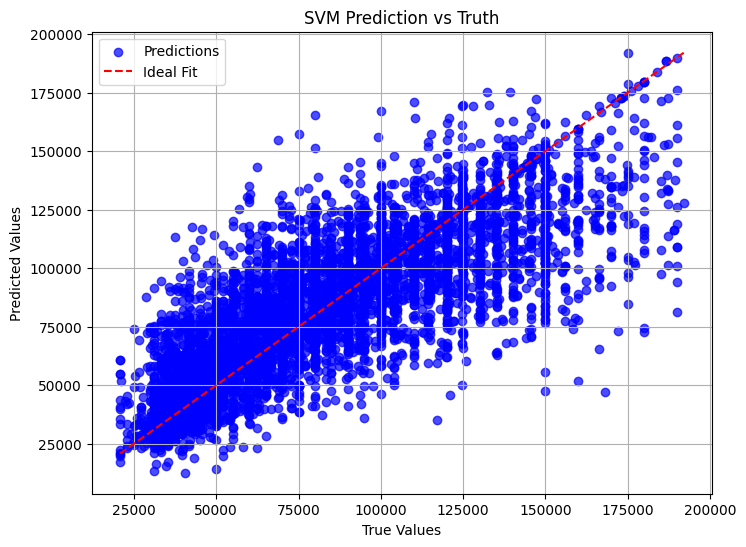

Mean Squared Error: 520080480.05


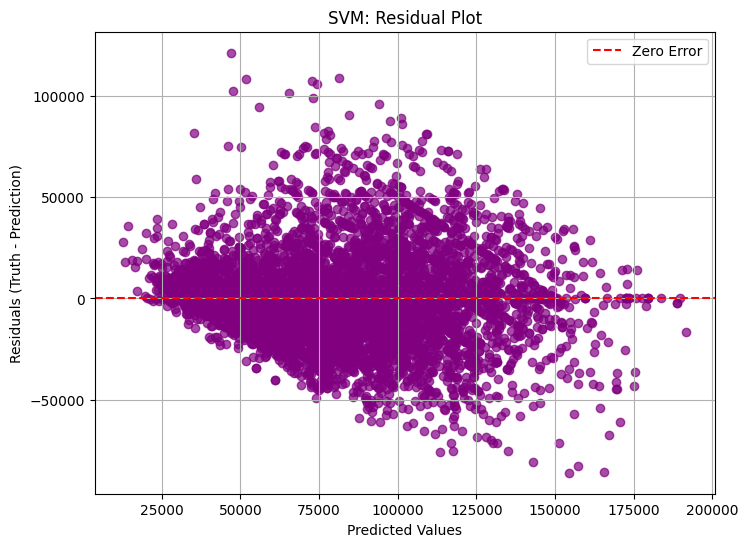

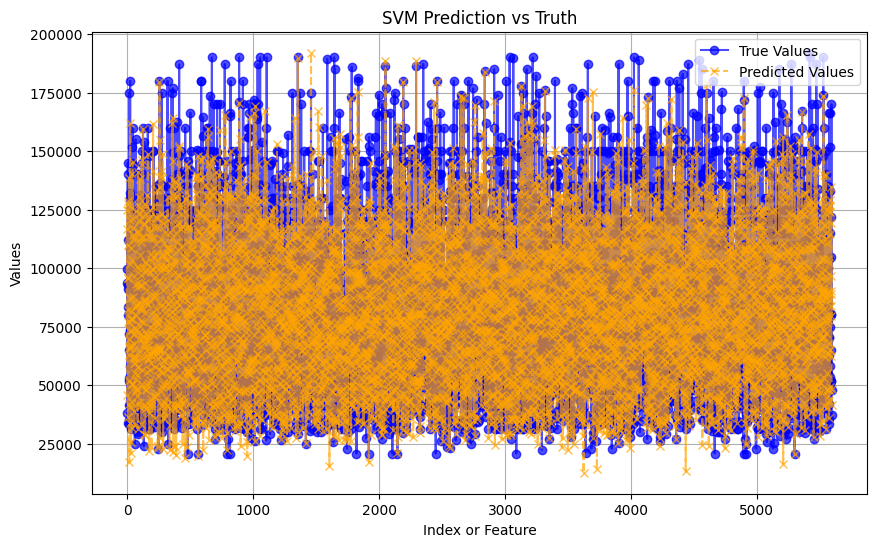

In [17]:
y_min_test_original = scaler_min.inverse_transform(np.array(y_min_test).reshape(-1, 1))
y_min_pred_original = scaler_min.inverse_transform(np.array(svr_predictions).reshape(-1, 1))


plot_prediction_vs_truth(y_min_test_original, y_min_pred_original, model="SVM")
plot_residuals(y_min_test_original, y_min_pred_original, model="SVM")
plot_predictions_and_truth(y_min_test_original, y_min_pred_original, model="SVM")

## Gradient Boosting plots

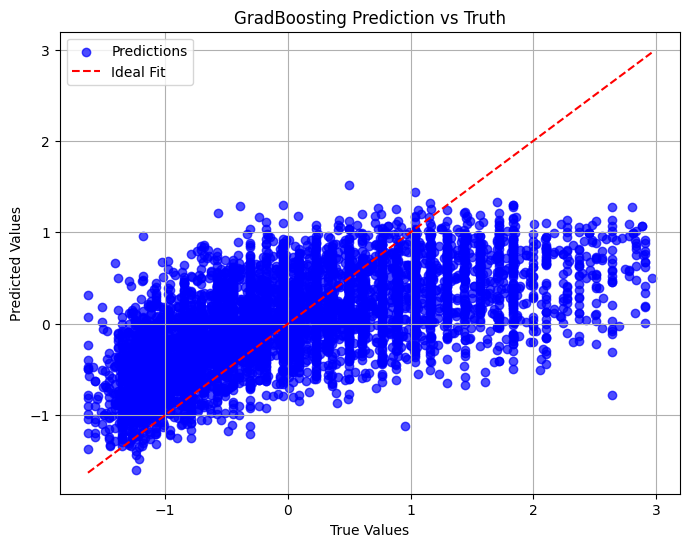

Mean Squared Error: 0.59


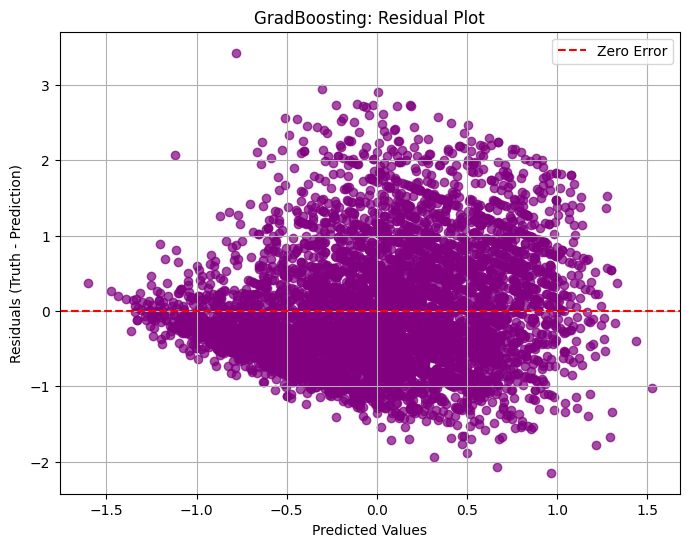

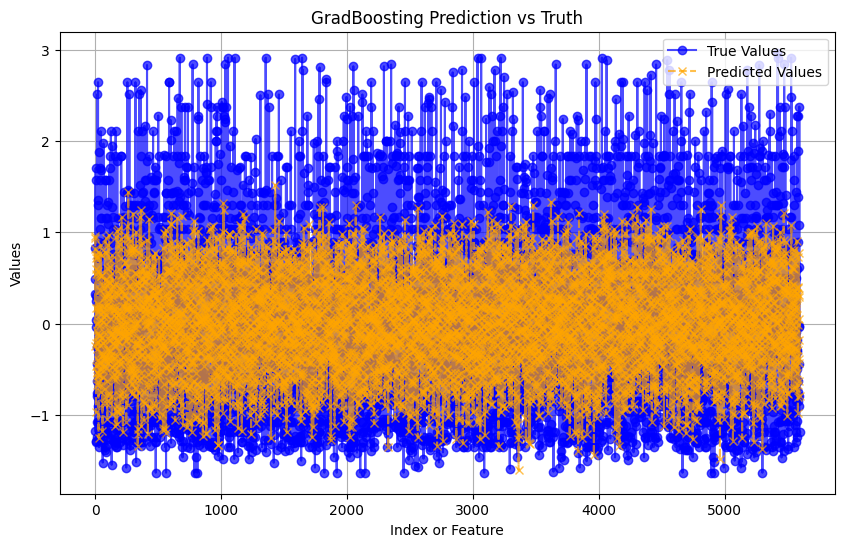

In [16]:
plot_prediction_vs_truth(y_min_test, gbr_predictions, model="GradBoosting")
plot_residuals(y_min_test, gbr_predictions, model="GradBoosting")
plot_predictions_and_truth(y_min_test, gbr_predictions, model="GradBoosting")

# Evaluation for predicting max_salary

In [ ]:
# SVR with optimized parameters
best_svr_max_salary.fit(X_train, y_max_train)
svr_predictions = best_svr_max_salary.predict(X_test)
svr_mse = mean_squared_error(y_max_test, svr_predictions)
print("Optimized SVR MSE:", svr_mse)


Optimized SVR MSE: 2845486560.0123754


In [ ]:
# # Gradient Boosting Regressor with optimized parameters
# best_gbr_max_salary.fit(X_train, y_max_train)
# gbr_predictions = best_gbr_max_salary.predict(X_test)
# gbr_mse = mean_squared_error(y_max_test, gbr_predictions)
# print("Optimized GBR MSE:", gbr_mse)

## SVM plots

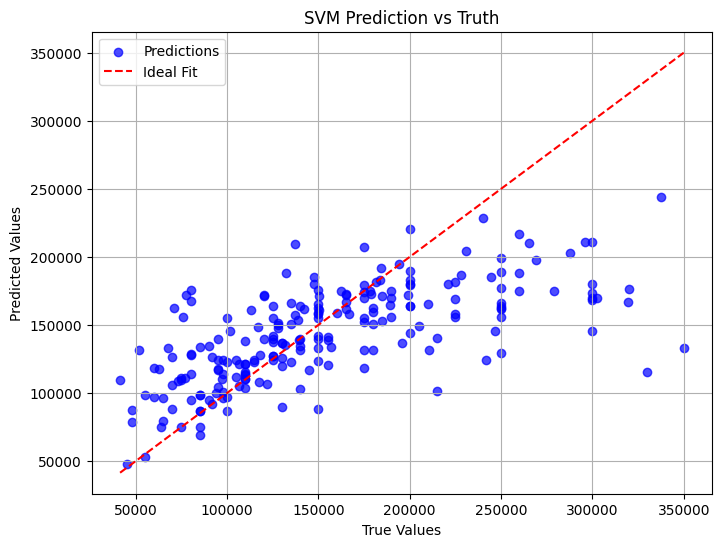

Mean Squared Error: 2845486560.01


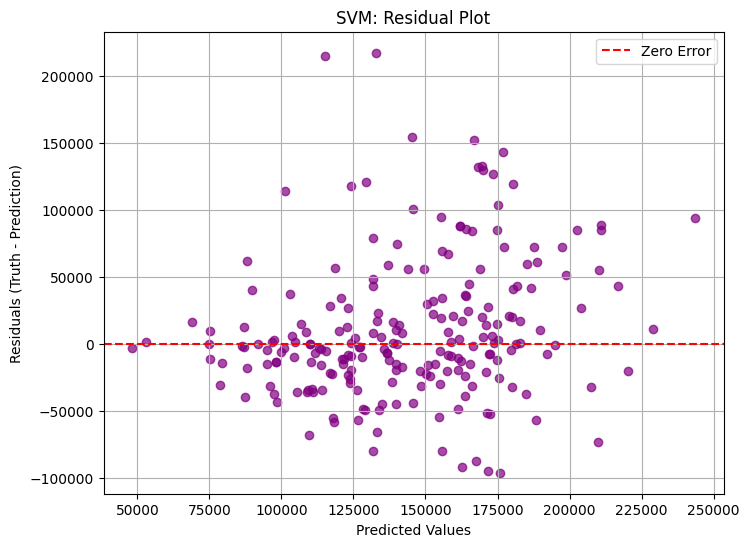

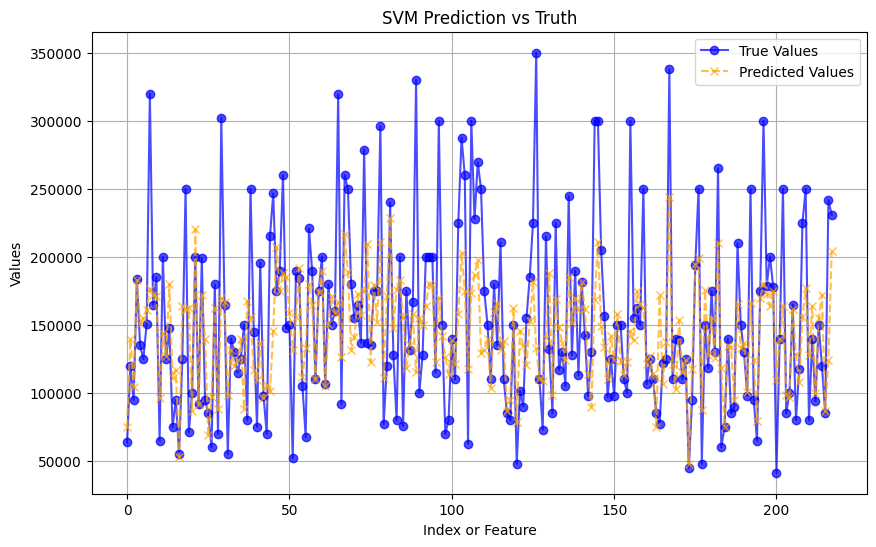

In [ ]:
plot_prediction_vs_truth(y_max_test, svr_predictions, model="SVM")
plot_residuals(y_max_test, svr_predictions, model="SVM")
plot_predictions_and_truth(y_max_test, svr_predictions, model="SVM")

## Gradient Boosting plots

In [ ]:
# plot_prediction_vs_truth(y_max_test, gbr_predictions, model="GradBoosting")
# plot_residuals(y_max_test, gbr_predictions, model="GradBoosting")
# plot_predictions_and_truth(y_max_test, gbr_predictions, model="GradBoosting")

In [ ]:
# de-standardize
y_min_pred_original = scaler_min.inverse_transform(np.array(y_min).reshape(-1, 1))
y_max_pred_original = scaler_max.inverse_transform(np.array(y_max).reshape(-1, 1))